<center><img src="img/aml-logo.png" width="600"/>

***

<center>Lecture 4</center>

***

<center>Preprocessing and Feature Transformation  </center>

***

<center>27 February 2023<center>
<center>Rahman Peimankar<center>

# Agenda

* Data Scaling
* CV and GridSearchCV with sklearn Pipeline 
* Feature Transformation (ColumnTransformer)

Coming up with features is difficult, time-consuming, requires expert knowledge. "Applied machine learning" is basically feature engineering.
<div style="text-align: right">
"Andrew Ng"

# Recap of Last Week

<div>
<center>
<img src="img/image-6-lecture3.jpg" width="700"/>

<div>
<center>
<img src="img/image-7-lecture3.jpg" width="800"/>

<div>
<center>
<img src="img/image-11-lecture3.jpg" width="800"/>

<div>
<center>
<img src="img/image-14-lecture3.jpg" width="1500"/>

<div>
<center>
<img src="img/image-16-lecture3.jpg" width="900"/>

<div>
<center>
<img src="img/image-17-lecture3.jpg" width="900"/>

<div>
<center>
<img src="img/image-20-lecture3.jpg" width="1400"/>

# Boston housing dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["savefig.dpi"] = 300
plt.rcParams['savefig.bbox'] = 'tight'

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
from sklearn.model_selection import train_test_split
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\abpe\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

<div>
<center>
<img src="img/image-1.jpg" width="900"/>
</div>

# Looking into the distribution of the features

<Figure size 2400x3000 with 0 Axes>

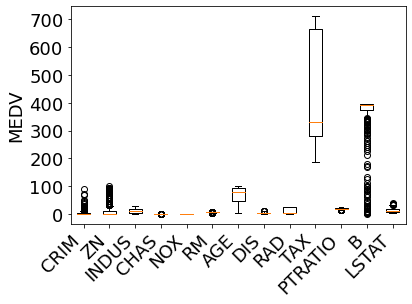

<Figure size 2400x3000 with 0 Axes>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.boxplot(X)
plt.xticks(np.arange(1, X.shape[1] + 1), boston.feature_names, rotation=45, ha="right", fontsize=18)
plt.ylabel("MEDV", fontsize=18)
plt.yticks(fontsize=18)
plt.figure(figsize=(8, 10), dpi=300)

# Scaling and Distances

<div>
<center>
<img src="img/image-2.jpg" width="700"/>
</div>

<div>
<center>
<img src="img/image-3.jpg" width="700"/>
</div>

# Different Ways to Scale the Data

<div>
<center>
<img src="img/image-4.jpg" width="1200"/>
</div>

# Standard Scaler Example

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

knn_scaled = KNeighborsRegressor().fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
print('Scaled: {}'.format(knn_scaled.score(X_test_scaled, y_test)))

knn_unscaled = KNeighborsRegressor().fit(X_train, y_train)
print('Not scaled: {}'.format(knn_unscaled.score(X_test, y_test)))

Scaled: 0.606952770711171
Not scaled: 0.4616380924610112


# Proper scaling

<div>
<center>
<img src="img/image-5.jpg" width="1200"/>
</div>

Please discuss your idea about the above figures and why the last scaling approach/figure is not proper. 

# Sckit-Learn API Summary

<div>
<center>
<img src="img/image-6.jpg" width="1200"/>
</div>

<font size="8"><center>A note on preprocessing
***
<font size="8"><center>(and pipelines)

# Leaking Information

<div>
<center>
<img src="img/image-7.jpg" width="800"/>
</div>

<div>
<center>
<img src="img/image-8.jpg" width="800"/>
</div>

<div>
<center>
<img src="img/image-9.jpg" width="1200"/>
</div>

# Naming Steps

In [5]:
from sklearn.pipeline import make_pipeline
knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
print(knn_pipe.steps)

[('standardscaler', StandardScaler()), ('kneighborsregressor', KNeighborsRegressor())]


In [6]:
from sklearn.pipeline import Pipeline
pipe = Pipeline((("scaler", StandardScaler()), ("regressor", KNeighborsRegressor)))

# Pipeline and GridSearchCV

In [7]:
from sklearn.model_selection import GridSearchCV
knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
param_grid = {'kneighborsregressor__n_neighbors': range(1, 10)}
grid = GridSearchCV(knn_pipe, param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

{'kneighborsregressor__n_neighbors': 7}
0.5999825126971097


<font size="8"><center>Discrete features

## Quiz - Feature

Can you name some feature types?

Please write your answers [here](https://PollEv.com/free_text_polls/WjGsUSxLtYzEv5XJ18XKe/respond).

# Categorical Variables

In [8]:
import pandas as pd

df = pd.DataFrame(
{'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})

df

,boro,vegan
0,Manhattan,No
1,Queens,No
2,Manhattan,No
3,Brooklyn,Yes
4,Brooklyn,Yes
5,Bronx,No


# Ordinal encoding

In [9]:
df['boro_ordinal'] = df.boro.astype("category").cat.codes
df

,boro,vegan,boro_ordinal
0,Manhattan,No,2
1,Queens,No,3
2,Manhattan,No,2
3,Brooklyn,Yes,1
4,Brooklyn,Yes,1
5,Bronx,No,0


# One-Hot (Dummy) Encoding

In [10]:
df

,boro,vegan,boro_ordinal
0,Manhattan,No,2
1,Queens,No,3
2,Manhattan,No,2
3,Brooklyn,Yes,1
4,Brooklyn,Yes,1
5,Bronx,No,0


In [11]:
pd.get_dummies(df)

,boro_ordinal,boro_Bronx,boro_Brooklyn,boro_Manhattan,boro_Queens,vegan_No,vegan_Yes
0,2,0,0,1,0,1,0
1,3,0,0,0,1,1,0
2,2,0,0,1,0,1,0
3,1,0,1,0,0,0,1
4,1,0,1,0,0,0,1
5,0,1,0,0,0,1,0


In [12]:
pd.get_dummies(df, columns=['boro'])

,vegan,boro_ordinal,boro_Bronx,boro_Brooklyn,boro_Manhattan,boro_Queens
0,No,2,0,0,1,0
1,No,3,0,0,0,1
2,No,2,0,0,1,0
3,Yes,1,0,1,0,0
4,Yes,1,0,1,0,0
5,No,0,1,0,0,0


In [13]:
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                  'boro': [0, 1, 0, 2, 2, 3]})
df

,salary,boro
0,103,0
1,89,1
2,142,0
3,54,2
4,63,2
5,219,3


In [14]:
pd.get_dummies(df)

,salary,boro
0,103,0
1,89,1
2,142,0
3,54,2
4,63,2
5,219,3


In [15]:
pd.get_dummies(df, columns=['boro'])

,salary,boro_0,boro_1,boro_2,boro_3
0,103,1,0,0,0
1,89,0,1,0,0
2,142,1,0,0,0
3,54,0,0,1,0
4,63,0,0,1,0
5,219,0,0,0,1


# You need to be careful!

<div>
<center>
<img src="img/image-10.jpg" width="1200"/>
</div>

In [16]:
import pandas as pd
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': ['Manhattan', 'Queens', 'Manhattan',
                            'Brooklyn', 'Brooklyn', 'Bronx']})
df['boro'] = pd.Categorical(df.boro, categories=['Manhattan', 'Queens', 'Brooklyn',
                                                'Bronx', 'Staten Island'])
pd.get_dummies(df)

,salary,boro_Manhattan,boro_Queens,boro_Brooklyn,boro_Bronx,boro_Staten Island
0,103,1,0,0,0,0
1,89,0,1,0,0,0
2,142,1,0,0,0,0
3,54,0,0,1,0,0
4,63,0,0,1,0,0
5,219,0,0,0,1,0


# OneHotEncoder

In [17]:
from sklearn.preprocessing import OneHotEncoder

df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],'boro': [0, 1, 0, 2, 2, 3]})
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing boro column (label encoded values of boro)
enc_df = pd.DataFrame(enc.fit_transform(df[['boro']]).toarray())
# merge with main df on key values
df = df.join(enc_df)
df

,salary,boro,0,1,2,3
0,103,0,1.0,0.0,0.0,0.0
1,89,1,0.0,1.0,0.0,0.0
2,142,0,1.0,0.0,0.0,0.0
3,54,2,0.0,0.0,1.0,0.0
4,63,2,0.0,0.0,1.0,0.0
5,219,3,0.0,0.0,0.0,1.0


# OneHotEncoder

In [18]:
import pandas as pd
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219], 'boro': ['Manhattan', 'Queens', 'Manhattan', 
                                                                   'Brooklyn', 'Brooklyn', 'Bronx']})
ce = OneHotEncoder().fit(df)
ce.transform(df).toarray()

array([[0., 0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.]])

<font color='red'>Always transforms all columns

# What is the solution?

OneHotEncoder + ColumnTransformer

In [19]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

x_train = pd.DataFrame({'fruit': ['apple','orange', np.nan],
                        'score': [np.nan, 12, 98]})

# Categorical pipeline
categorical_preprocessing = Pipeline(
[
    ('Imputation', SimpleImputer(strategy='constant', fill_value='?')),
    ('One Hot Encoding', OneHotEncoder(handle_unknown='ignore')),
]
)

# Numeric pipeline
numeric_preprocessing = Pipeline(
[
     ('Imputation', SimpleImputer(strategy='mean')),
     ('Scaling', StandardScaler())
]
)


# Creating preprocessing pipeline
preprocessing = make_column_transformer(
     (numeric_preprocessing, ['score']),
     (categorical_preprocessing, ['fruit']),
)

# Final pipeline
pipeline = Pipeline(
[('Preprocessing', preprocessing)]
)

test = pipeline.fit_transform(x_train)


<div>
<center>
<img src="img/image-11.jpg" width="1500"/>
</div>

<font size="25"><center>Thank you!